In [1]:
# https://github.com/richzhang/PerceptualSimilarity

In [107]:
import lpips
import torch
from skimage import io
import numpy as np

In [13]:
loss_fn_alex = lpips.LPIPS(net='alex')
loss_fn_vgg = lpips.LPIPS(net='vgg')

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/diego/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
79.7%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

100.0%


Loading model from: /home/diego/.local/lib/python3.8/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/diego/.cache/torch/hub/checkpoints/vgg16-397923af.pth
77.5%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

83.6%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

94.5%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Cur

Loading model from: /home/diego/.local/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth


In [14]:
img0 = torch.zeros(1,3,64,64)
img1 = torch.zeros(1,3,64,64)

In [26]:
d1 = loss_fn_alex(img0, img1)

In [27]:
d1

tensor([[[[0.]]]], grad_fn=<AddBackward0>)

In [28]:
d2 = loss_fn_vgg(img0, img1)

In [29]:
d2

tensor([[[[0.]]]], grad_fn=<AddBackward0>)

In [99]:
imgA = io.imread('original.jpg')

In [100]:
imgB = io.imread('lsb.png')

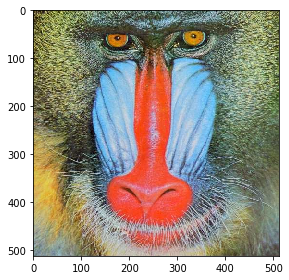

In [101]:
io.imshow(imgA)

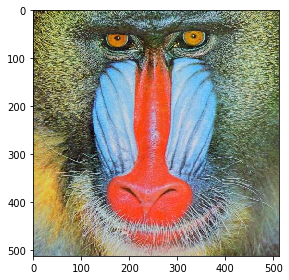

In [102]:
io.imshow(imgB)

In [111]:
MSE = ((imgA - imgB) ** 2).mean()

In [112]:
MSE

1.4291089375813801

In [89]:
imgA = (imgA.astype('float32') / 127.5) - 1
img2 = torch.tensor([imgA.T])

In [91]:
imgB = (imgB.astype('float32') / 127.5) - 1
img3 = torch.tensor([imgB.T])

In [92]:
d3 = loss_fn_alex(img2, img3)

In [93]:
d3

tensor([[[[0.0003]]]], grad_fn=<AddBackward0>)

In [94]:
d4 = loss_fn_vgg(img2, img3)

In [95]:
d4

tensor([[[[0.0025]]]], grad_fn=<AddBackward0>)